In [99]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

In [80]:
# Read in HTML table into a DataFrame
Mars_df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df= Mars_df[0]

In [81]:
df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'], dtype='object')

In [82]:
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [83]:
# to convert string/object data type to datetime datatype
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [84]:
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [85]:
# How many months exist on Mars?
number_of_months= df['month'].nunique()
number

12

In [86]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
df['sol'].notnull().count()

1867

In [87]:
total_days= df['sol'].iloc[-1]

In [88]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
coldest= df['min_temp'].min()
print(f'coldest temp is {coldest} degrees celsius')
warmest= df['min_temp'].max()
print(f'warmest temp is {warmest} degrees celsius')

coldest temp is -90.0 degrees celsius
warmest temp is -62.0 degrees celsius


In [93]:
minTemp_month= df['month'].loc[df['min_temp']==coldest]
print(minTemp_month)
max_Temp_month=  df['month'].loc[df['min_temp']==warmest]
print(max_Temp_month)

1093    3
Name: month, dtype: int64
1582    1
Name: month, dtype: int64


In [95]:
# Getting the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
average_temp= df['min_temp'].mean()
average_temp

-76.12104981253347

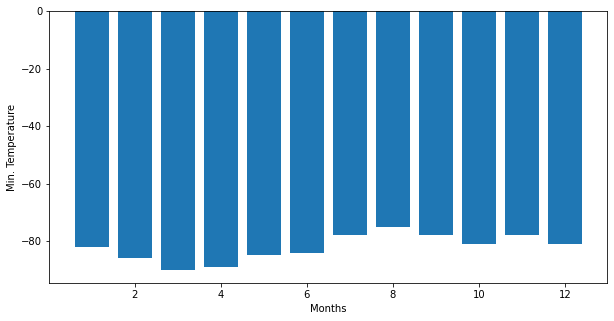

In [155]:
plt.figure (figsize=(10,5))
plt.bar(df['month'],df['min_temp'])
# plt.figure(figsize=(200, 100))
plt.xlabel("Months")
plt.ylabel("Min. Temperature")
# plt.legend()
plt.show()

# by looking at bar chart, month 8 is highest and month 3 is lowest in average temp. record.

In [118]:
highest= df['pressure'].max()
lowest= df['pressure'].min()

In [131]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
high_pressure_month_row= df.loc[df['pressure']==highest]
print(high_pressure_month_row)
print('***********************************************************************')
high_pressure_month= high_pressure_month_row['month']
print(high_pressure_month)
# Month 9 is high pressure month
# print(df.to_string(index=False))

      id terrestrial_date  sol   ls  month  min_temp  pressure
156   80       2013-01-27  170  252      9     -66.0     925.0
157   81       2013-01-28  171  253      9     -67.0     925.0
766  785       2014-12-23  846  257      9     -74.0     925.0
***********************************************************************
156    9
157    9
766    9
Name: month, dtype: int64


In [132]:
low_pressure_month_row= df.loc[df['pressure']==lowest]
print(low_pressure_month_row)
print('***************************************************************************')
low_pressure_month= low_pressure_month_row['month']
print(low_pressure_month)

        id terrestrial_date   sol   ls  month  min_temp  pressure
1866  1895       2018-02-27  1977  135      5     -77.0     727.0
***************************************************************************
1866    5
Name: month, dtype: int64


In [134]:
# Getting the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
average_pressure= df['pressure'].mean()
average_pressure

841.0664167113016

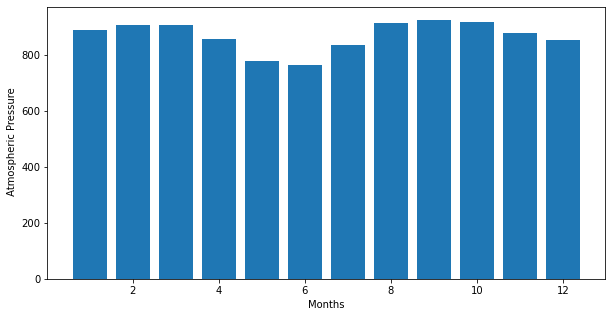

In [144]:
plt.figure (figsize=(10,5))
plt.bar(df['month'],df['pressure'])
plt.xlabel("Months")
plt.ylabel(" Atmospheric Pressure")
plt.show()

# by looking at bar chart, average atmospheric pressure is lowest in month 6 and highest in month 9.

In [145]:

# That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
# Visually estimate the result by plotting the daily minimum temperature.

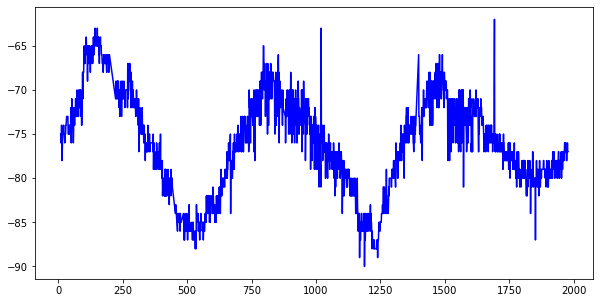

In [196]:
# About how many terrestrial (Earth) days exist in a Martian year? 
# From figure, number of days elapsed by earth and mars are almost same, which implies that in a martian year, around 
# terrestrial 360 days exist
plt.figure (figsize=(10,5))
plt.plot(df['sol'], df['min_temp'],color= 'blue')
plt.show()

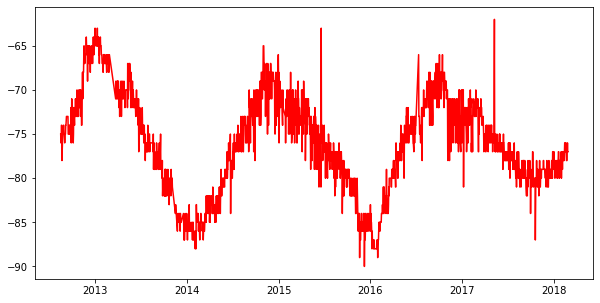

In [170]:
plt.figure (figsize=(10,5))
plt.plot(df['terrestrial_date'], df['min_temp'],color= 'red')
plt.show()

In [188]:
dates= df['terrestrial_date'].loc[(df['terrestrial_date'] > '2012-08-16') & (df['terrestrial_date'] <'2013-08-16')]
temps= df['min_temp'].loc[(df['terrestrial_date'] > '2012-08-16') & (df['terrestrial_date'] <'2013-08-16')]

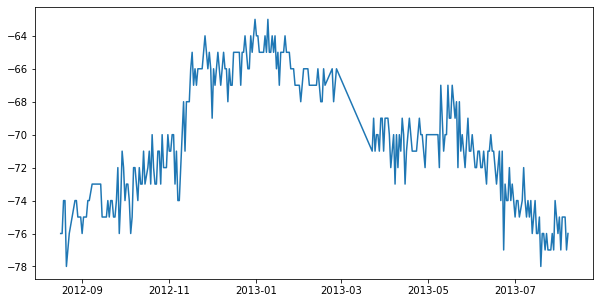

In [195]:
plt.figure (figsize=(10,5))
plt.plot(dates,temps)
plt.show()

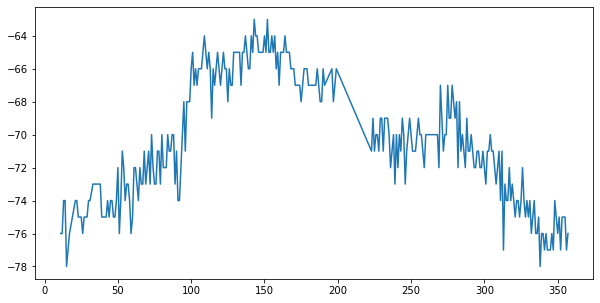

In [194]:
plt.figure (figsize=(10,5))
sols= df['sol'].loc[(df['terrestrial_date'] > '2012-08-16') & (df['terrestrial_date'] <'2013-08-16')]
plt.plot(sols,temps)
plt.show()

In [197]:
# from the plots above, it is quite clear that total number of terrestrial days per year is almost equal to Martian year.

In [204]:
df.to_csv('Mars_Data', encoding='utf-8', index= False)